# Credit Card Fraud Detection Project

## Introduction
Project Overview: This project aims to develop a credit card fraud detection system.
Importance: Credit card fraud has a significant financial impact, making the detection of fraudulent transactions crucial.


## Abstract :
This project mainly focuses on handling imbalanced datasets and detecting credit-card frauds using Following Machine Learning Algorithms:

a) Logistic Regression

b) RandomForestClassifier

c) DecisionTreeClassifier


These models are fittted to different datasets acquired after StandardScaler, Oversampling, Undersampling. Thus, separate files are created for each Machine Learning Models so that every datasets acquired after above mentioned techniques are fitted separately to our model using single function.



## ABOUT DATASETS: 
    
This datasets have 492 frauds out of 284,807 transactions. It is highly unbalanced, the positive class--1 (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features are not provided and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset.But, we did not consider Time for training purpose as it is of no use to build the models and may not impact our target variable.

The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## STEPS :
    
Importing Libraries & Loading Datasets.

Data Preprocessing & Preparing Datasets.

Exploratoty Data Analysis(EDA) & Visualization.

Handling Imbalanced Datasets.

Conclusions.

Further Enhancements.

Acknowledgement and References.

## STEP-1: Importing Libraries & Loading Datasets.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Datasets

In [6]:
df=pd.read_csv(r'C:\Users\SoumyaDas\Desktop\creditcard1.csv')

## STEP-2: Data Preprocessing & Preparing Datasets.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### Droping Time Attribute
It is of no use to build the models and may not impact our target variable.

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

#### Now, X and y are our normal datasets

In [14]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Normalizing Amountattribute values using StandardScaler
I've tried with MinMaxScaler and got similar results.
You can also try and experiment with various scaling techniques.

In [15]:
temp_df =df.copy()

In [16]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 30), (284807,))

### STEP-3: Exploratoty Data Analysis(EDA) & Visualization.
Making data ready for Plotting of Count values of Different Classes.

In [17]:
class_count_df = pd.DataFrame(df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


In [18]:
# fig = plt.figure()
# fig.set_figheight(8)
# fig.set_figwidth(10)
# plt.bar(class_count_df['Class'], class_count_df['Counts'],color=['green','red']);

### BAR_GRAPH

C:\Users\SoumyaDas\AppData\Local\Temp\ipykernel_19816\1475047372.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


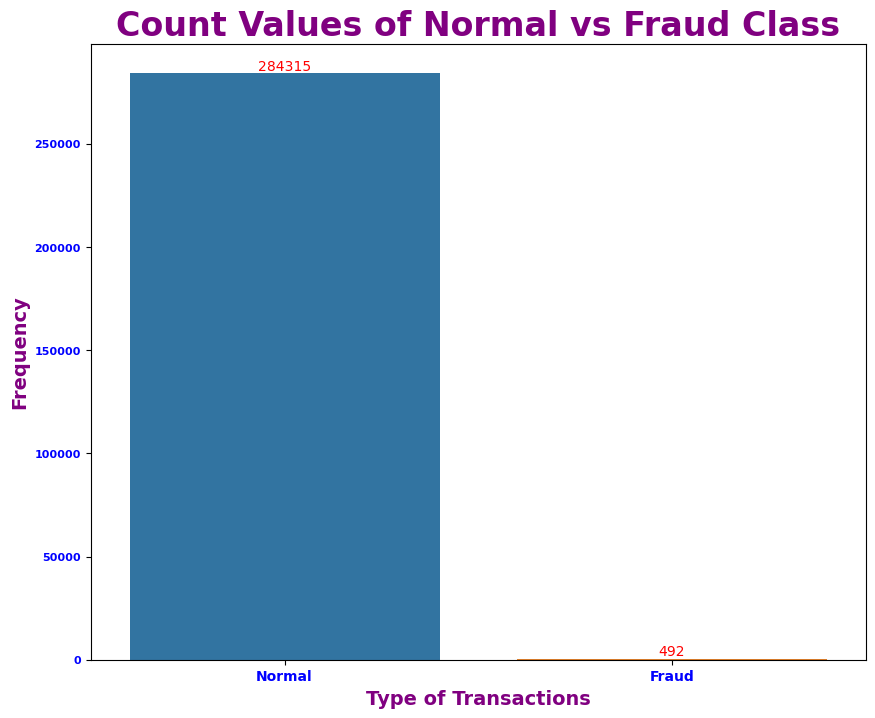

In [19]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

### Analyzing before plotting graph of Variation of Amount per Class

In [20]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
fraud.shape, normal.shape

((492, 31), (284315, 31))

In [21]:
fraud_frc = len(fraud)/float(len(df))
fraud_frc

0.001727485630620034

In [22]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.17%


In [23]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## HISTOGRAM

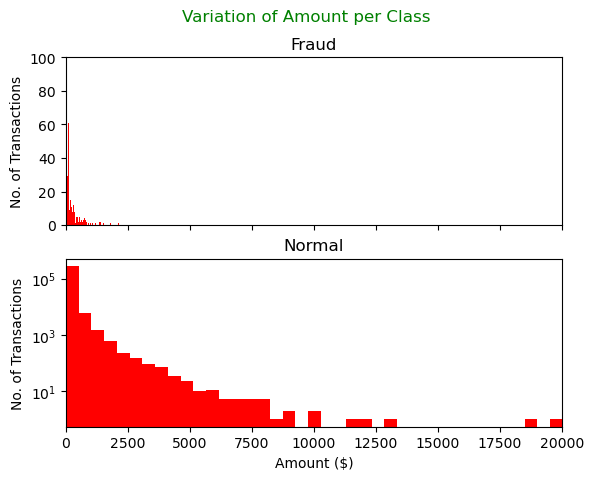

In [25]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

## STEP-4: Handling Imbalanced Datasets.

## 1) Choose Proper Evaluation Metrics
Accuracy may be good enough for a well-balanced class but not ideal for the imbalanced class problem. 
The other metrics like precision( measure of how accurate the classifier’s prediction of a specific class ) 
and recall ( measure of the classifier’s ability to identify a class ) are also considered.

For an imbalanced class dataset, F1 score is a more appropriate metric.
F1 score is defined as the harmonic mean between precision and recall. 
It is used as a statistical measure to rate performance.
F1-score ranges between 0 and 1. The closer it is to 1, the better the model.

## 2) Resampling(Undersampling and Oversampling)


### OverSampling

In [26]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==0)] 
df_minority = df[(df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

Final Sampled Dataset:

In [28]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((568630, 30), (568630,))

#### Undersampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


### 3) SMOTE(Synthetic Minority Oversampling Technique)

##### Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.



# Machine Learning Algorithm :- Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(df.drop('Class', axis=1),df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

## Function for model fitting, model evaluation and Visualization.

In [39]:
def LR_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds =lr.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")


## Logistic Regression on Normal Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....


C:\Users\SoumyaDas\ancondanew\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.72      0.67      0.70       394

    accuracy                           1.00    227845
   macro avg       0.86      0.84      0.85    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

99.899054%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.864822%



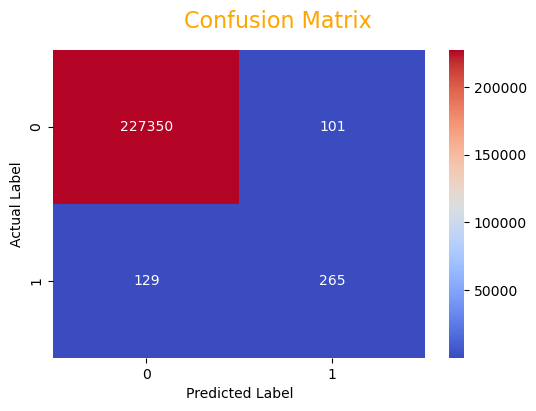

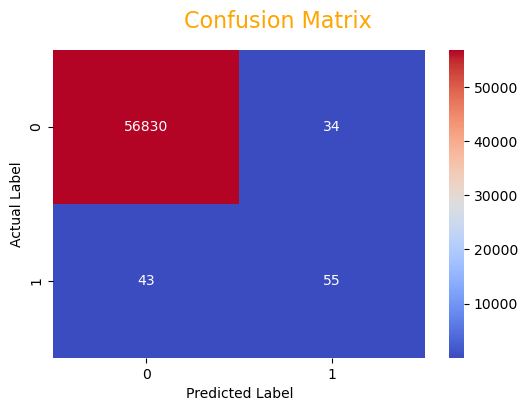

In [40]:
LR_model(X,y)

## Logistic Regression on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       393
           1       0.96      0.92      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



Accuracy Score:

94.282084%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197





C:\Users\SoumyaDas\ancondanew\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:

92.893401%



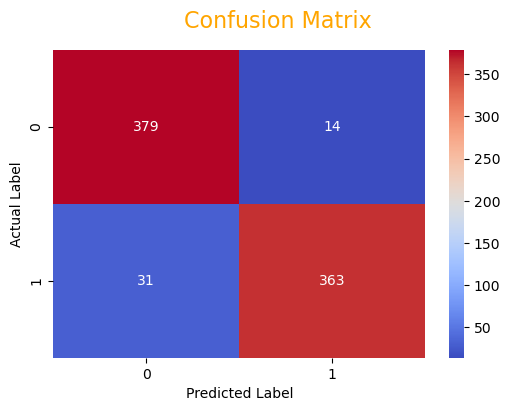

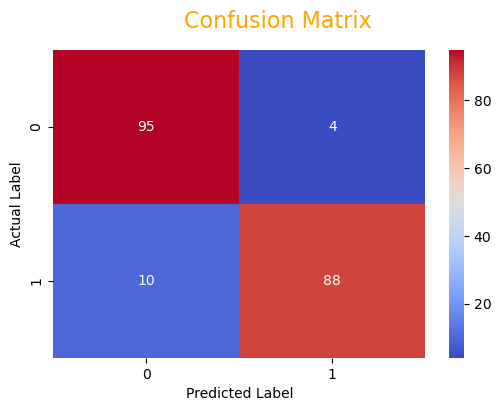

In [41]:
LR_model(X_undersampled,y_undersampled)

## Logistic Regression on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94    227335
           1       0.96      0.91      0.94    227569

    accuracy                           0.94    454904
   macro avg       0.94      0.94      0.94    454904
weighted avg       0.94      0.94      0.94    454904



Accuracy Score:

93.712080%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56980
           1       0.96      0.91      0.94     56746

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



Accuracy Score:

93.822873%



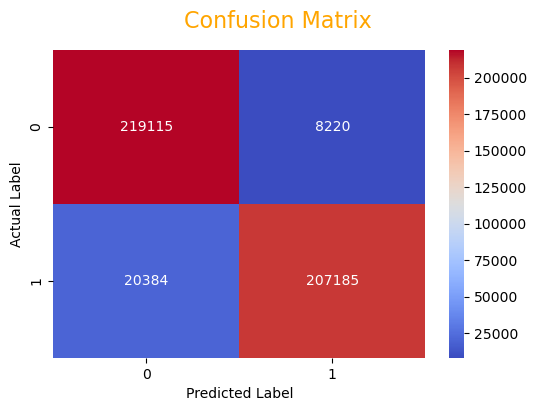

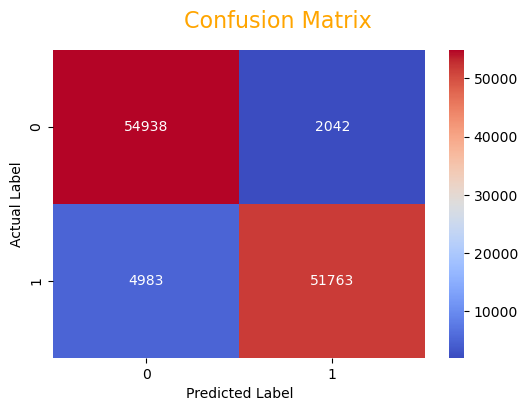

In [42]:
LR_model(X_oversampled,y_oversampled)

## CONCLUSION:
a) Logistic Regression doesn't work efficiently for this imbalanced datasets.

b) It takes around 1-2 minutes for training.

c) Maximum Accuracy of 99.864822% and Macro Average of F1-Score of 0.85 acheived with StandardScaled datasets.



# ML Algorithm-2 : Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Function for model fitting, model evaluation and Visualization.

In [44]:
def DT_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = dt.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = dt.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

## Decision Tree on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.82      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.912222%



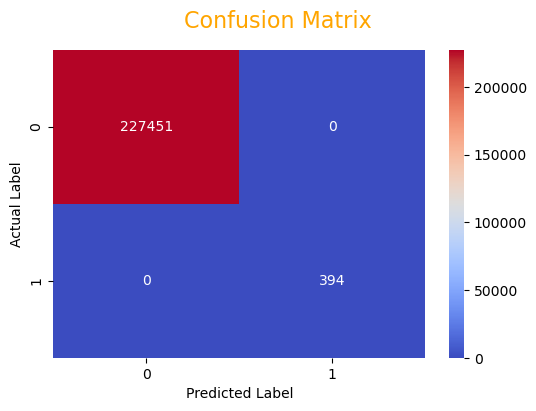

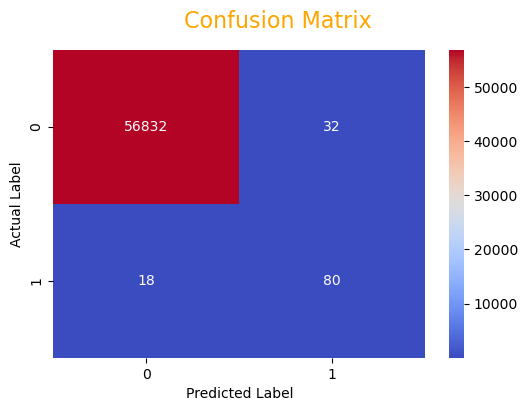

In [45]:
DT_model(X,y)

## Decision Tree on StandardScaled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.82      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.912222%



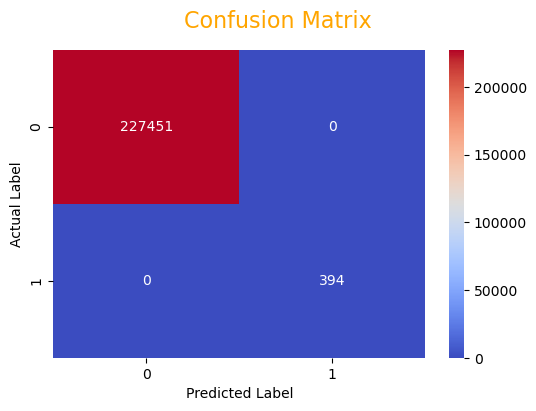

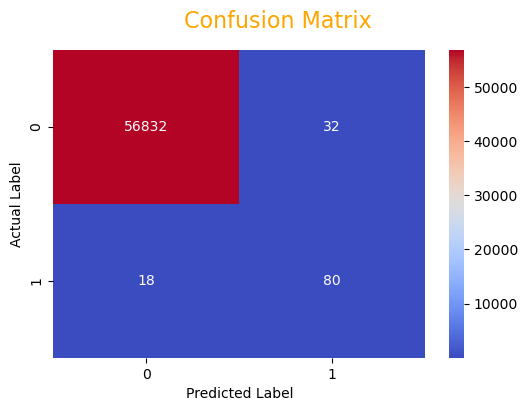

In [47]:
DT_model(X_scaled,y_scaled)

### Decision Tree on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        99
           1       0.92      0.86      0.89        98

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197



Accuracy Score:

89.340102%



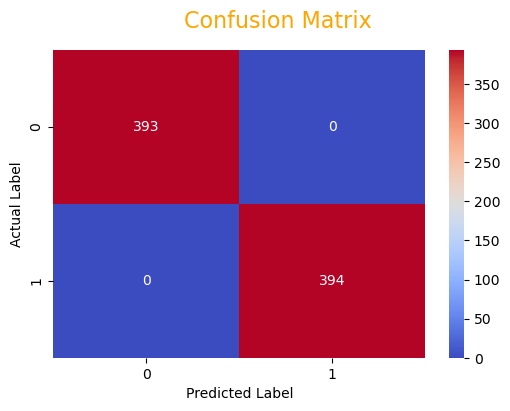

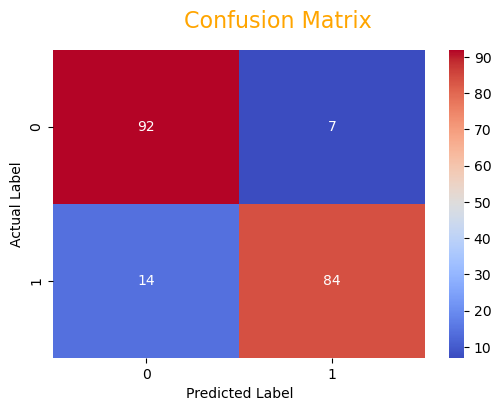

In [48]:
DT_model(X_undersampled,y_undersampled)

## Decision Tree on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.969224%



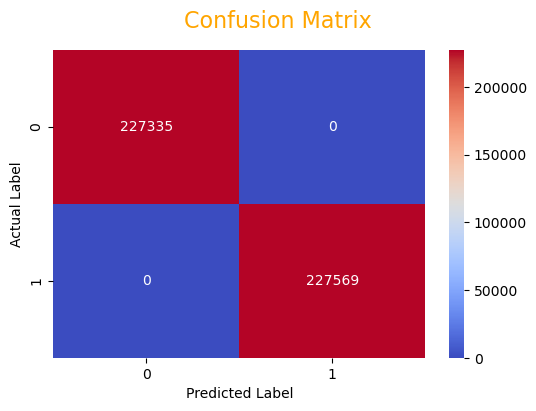

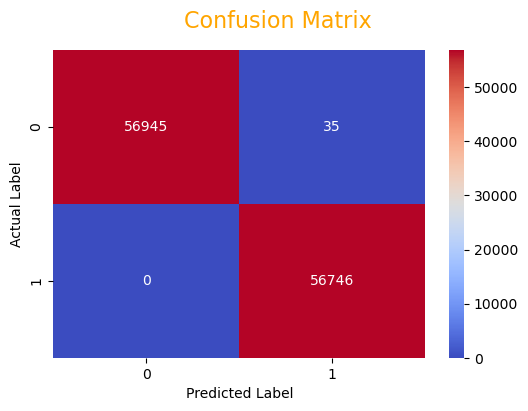

In [49]:
DT_model(X_oversampled,y_oversampled)

## CONCLUSION:
a) Decision Tree works even efficiently for this imbalanced datasets.

b) It takes around 1-2 minutes for training.

c) Maximum Accuracy of 99.969224% and macro-average of F1-Score of 1.00 acheived with Oversampling technique.

# ML Algorithm-3 : Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

## Function for model fitting, model evaluation and Visualization.

In [52]:
def RF_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = rf.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Training Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = rf.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

## RandomForestClassifier on Normal Datasets.

In [ ]:
RF_model(X,y)

## RandomForestClassifier on StandardScaled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.961378%



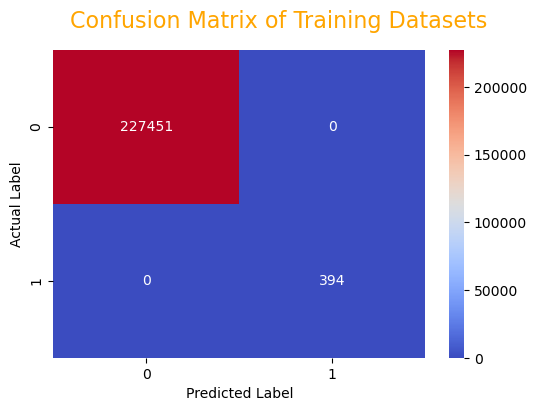

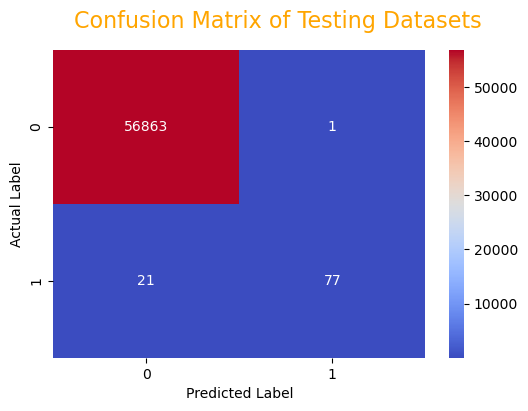

In [57]:
RF_model(X_scaled,y_scaled)

## RandomForestClassifier on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



Accuracy Score:

91.878173%



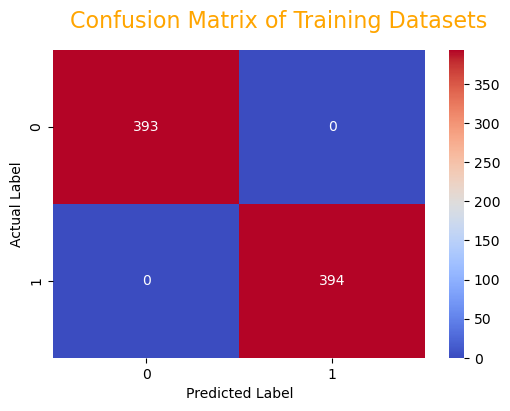

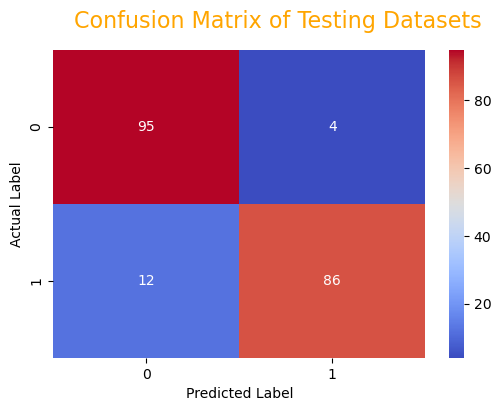

In [58]:
RF_model(X_undersampled,y_undersampled)

## RandomForestClassifier on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.997362%



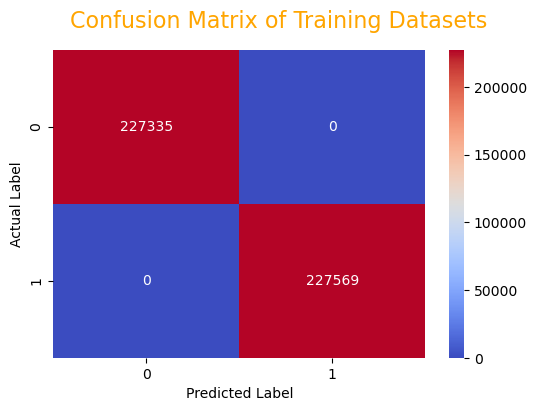

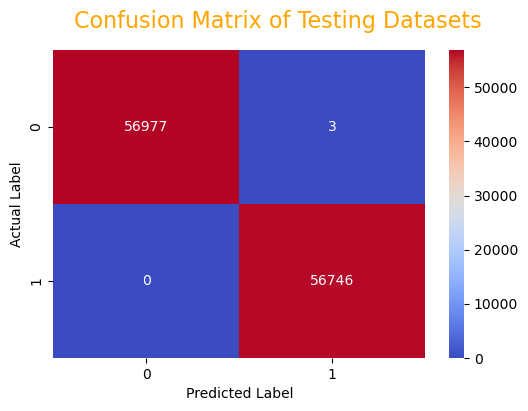

In [59]:
RF_model(X_oversampled,y_oversampled)

## CONCLUSION:
a) Undersampling doesn't work efficiently for Large majority class datasets as it ignore many valuable tuples. But, can be efficient for small majority class datasets

b) RandomForest works even efficiently for this imbalanced datasets.

c) RandomForest takes around 10-15 minutes for training.

d) Maximum Accuracy of 99.996483%and macro-average of F1-Score of 1.00 acheived with Oversampling technique.